# Cross-Cohort Music Recommendation - EDA

You are a data scientist for a remote education company. Your manager is interested in exploring non-traditional ways of boosting remote student engagement.

One avenue that they would like to particularly explore is the effect of "waiting-room" music on a students attentiveness for a 4-hour class. They've provided you a dataset of 61 songs and their "music2vec" embeddings.

You will complete the idiomatic steps of the machine-learning pipeline:
* EDA: what sorts of relationships/clusterings do you notice within your dataset?
* Machine Learning: which machine learning pipeline should you apply to your dataset. How will you measure the effectiveness of this model?

Once you generate your machine learning model, you will then serialize it and load it into a dashboard which provides song recommendations based on a users listening history.

To run this dashboard execute the following command in your terminal (after you've completed clustering)

```bash
streamlit run recommender.py
```

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
# TODO: load in dataset
songs = pd.read_csv("../data/music_embeds.csv")

# TODO: view first few columns
songs.head()

,filename,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767,song,genre
0,A Fan's Mail,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,...,-0.003038,-0.008058,-0.006683,-0.001391,-0.011345,-0.002085,-0.004069,-0.017774,A Fan's Mail,funk
1,Abracadabra,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,...,-0.007019,-0.006988,-0.013948,-0.000976,-0.013896,-0.012256,0.008407,-0.011757,Abracadabra,pop
2,Aguas De Marco,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,...,0.000567,-0.015456,-0.005778,-0.003446,-0.016408,-0.015601,0.005135,-0.005079,Aguas De Marco,bossa nova
3,Another Time,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,...,-0.005628,-0.020266,-0.005505,-0.007672,-0.020972,-0.005813,-0.000709,-0.005729,Another Time,hip hop
4,Belong to the World,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,...,-0.003443,0.002318,-0.010466,-0.018116,-0.008590,-0.010983,-0.009556,-0.004235,Belong to the World,hip hop


In [3]:
songs.shape

(61, 771)

In [4]:
# TODO: select your predictive columns
X = songs.drop(columns=["filename", "song"])

# TODO: select your song-name column for later manipulation
song_names = songs[["song"]]

# TODO: select your genre column for later manipulation
genres = songs[["genre"]]

In [5]:
dummy_vars = pd.get_dummies(X["genre"], drop_first=True)

new_X = pd.concat([X, dummy_vars], axis=1)

new_X.drop(columns=["genre"], inplace=True)

new_X.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,gospel,hip hop,house,indie,jazz,pop,pop rock,rock,soul,soundtrack
0,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,0.005474,...,False,False,False,False,False,False,False,False,False,False
1,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,0.000868,...,False,False,False,False,False,True,False,False,False,False
2,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,-0.006639,...,False,False,False,False,False,False,False,False,False,False
3,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,-0.003131,...,False,True,False,False,False,False,False,False,False,False
4,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,0.005363,...,False,True,False,False,False,False,False,False,False,False


In [6]:
# TODO: Using PCA, decompose your embeddings into 4 components for easy visualization
pca = PCA(n_components=4, svd_solver="randomized", whiten=True)

# TODO: fit & transform your predictors
X_pca = pca.fit_transform(new_X)

# TODO: view your PCA components
X_pca

array([[-0.18675795, -0.09332851, -0.01222084,  0.39706482],
       [-0.95703708, -1.17836742, -1.92779962, -1.23375639],
       [-0.13207859,  0.13618321,  0.110482  ,  0.08518785],
       [-0.80544682, -1.00702241,  2.07497812, -0.7066979 ],
       [-0.96237051, -1.16480354,  2.16503089, -0.83602427],
       [-0.72635443, -0.93792558,  2.03475286, -0.67160799],
       [-0.04275197,  0.17815068, -0.07486938,  0.24102878],
       [-0.39095924, -0.46457217, -0.34470934,  2.4858599 ],
       [-0.39863476, -0.17342348, -0.16384193,  0.59297924],
       [-0.90032204, -1.01296194, -2.02133805, -1.26441142],
       [ 2.24925872, -0.3535055 , -0.00711459, -0.45008077],
       [-0.16493023,  0.17740063,  0.03538945,  1.22892985],
       [ 2.3381752 , -0.29540488,  0.03407311, -0.39649947],
       [-1.03444298, -1.19560256, -1.88570464, -1.34880233],
       [-0.05175094,  0.05804286,  0.03124937,  0.22839772],
       [-0.37369388, -0.20204976, -0.07376674,  0.6424806 ],
       [-0.92165892, -0.

In [7]:
X2 = X.drop(columns=["genre"])

X2_pca = pca.fit_transform(X2)

X2_pca

array([[ 3.76789783e-01, -4.36497376e-01, -4.87937703e-01,
        -7.02616153e-01],
       [ 1.48832914e+00, -8.67863686e-01, -4.61240648e-01,
         1.71744342e+00],
       [-5.23803025e-02,  1.09597267e+00, -3.54738692e-01,
         5.31270004e-01],
       [ 4.14051145e-02, -6.17169186e-01, -8.50628161e-01,
        -1.01655236e+00],
       [ 1.38316521e+00, -2.28857483e-01, -9.10916489e-01,
         1.69219353e+00],
       [-5.76418171e-01, -5.46486311e-01, -7.61690196e-01,
        -2.82759425e-01],
       [-6.86971849e-01,  4.68971968e-01,  9.07279738e-01,
        -8.17268003e-01],
       [ 6.93200091e-01, -2.87161852e+00,  1.17232892e-01,
        -5.76998861e-01],
       [ 5.07859196e-01, -8.36693813e-02,  2.40221088e+00,
        -8.16334684e-01],
       [ 5.95990103e-01, -4.50437529e-02,  1.72669392e+00,
         9.82624736e-01],
       [-5.16022589e-01,  8.55697457e-02,  7.40031792e-01,
        -7.88311598e-01],
       [-3.34543630e-01, -7.24146374e-01, -1.56775059e+00,
      

In [8]:
# TODO: transform your X_pca variable into a dataframe
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2", "PC3", "PC4"])

# TODO: merge your pca components, song name, and genre together into one dataframe (be sure to merge on the index)
merged_df_1 = pd.merge(song_names, genres, left_index=True, right_index=True)
music = pd.merge(merged_df_1, pca_df, left_index=True, right_index=True)

# TODO: view the first 5 rows of your merged df
music.head()

,song,genre,PC1,PC2,PC3,PC4
0,A Fan's Mail,funk,-0.186758,-0.093329,-0.012221,0.397065
1,Abracadabra,pop,-0.957037,-1.178367,-1.927800,-1.233756
2,Aguas De Marco,bossa nova,-0.132079,0.136183,0.110482,0.085188
3,Another Time,hip hop,-0.805447,-1.007022,2.074978,-0.706698
4,Belong to the World,hip hop,-0.962371,-1.164804,2.165031,-0.836024


In [9]:
pca_df2 = pd.DataFrame(data=X2_pca, columns=["PC1", "PC2", "PC3", "PC4"])

merged_df_2 = pd.merge(song_names, genres, left_index=True, right_index=True)
music_2 = pd.merge(merged_df_1, pca_df2, left_index=True, right_index=True)

music_2.head()

,song,genre,PC1,PC2,PC3,PC4
0,A Fan's Mail,funk,0.376790,-0.436497,-0.487938,-0.702616
1,Abracadabra,pop,1.488329,-0.867864,-0.461241,1.717443
2,Aguas De Marco,bossa nova,-0.052380,1.095973,-0.354739,0.531270
3,Another Time,hip hop,0.041405,-0.617169,-0.850628,-1.016552
4,Belong to the World,hip hop,1.383165,-0.228857,-0.910916,1.692194


In [10]:
# TODO: BEGIN YOUR EDA! Create as many code-blocks as you need to answer your questions below

music["genre"].unique()

array(['funk', 'pop', 'bossa nova', 'hip hop', 'country rock',
       'electronic', 'rock', 'jazz', 'R&B', 'afrobeats', 'house',
       'folk rock', 'pop rock', 'J-pop', 'soundtrack', 'classical',
       'soul', 'gospel', 'J-rock', 'indie'], dtype=object)

In [11]:
music["genre"].value_counts()

genre
jazz            9
pop             7
soul            7
hip hop         7
electronic      5
R&B             5
rock            4
indie           3
folk rock       2
funk            2
afrobeats       1
country rock    1
pop rock        1
J-pop           1
soundtrack      1
classical       1
bossa nova      1
gospel          1
J-rock          1
house           1
Name: count, dtype: int64

In [12]:
music.isnull().sum()

song     0
genre    0
PC1      0
PC2      0
PC3      0
PC4      0
dtype: int64

In [13]:
music.describe()

,PC1,PC2,PC3,PC4
count,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01
mean,8.134716e-17,-1.456030e-17,-1.649409e-17,7.371153e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.034443e+00,-1.239436e+00,-2.068187e+00,-1.351421e+00
25%,-4.413685e-01,-5.012945e-01,-8.053136e-02,-8.011306e-01
50%,-2.529024e-01,-1.706443e-01,1.330211e-02,8.106289e-02
75%,-5.175094e-02,1.781507e-01,8.989857e-02,4.897531e-01
max,2.367470e+00,2.531090e+00,2.237077e+00,2.522283e+00


In [14]:
music_2.describe()

,PC1,PC2,PC3,PC4
count,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01
mean,-3.458072e-17,-1.055622e-16,3.731077e-17,1.783637e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.518236e+00,-2.871619e+00,-2.166613e+00,-2.378374e+00
25%,-7.318641e-01,-5.464863e-01,-7.001502e-01,-7.026162e-01
50%,-7.792942e-02,1.722061e-02,3.612517e-02,-8.503168e-02
75%,6.932001e-01,6.044428e-01,7.400318e-01,5.312700e-01
max,2.040594e+00,2.099948e+00,2.402211e+00,2.387732e+00


<Axes: xlabel='PC1', ylabel='PC3'>

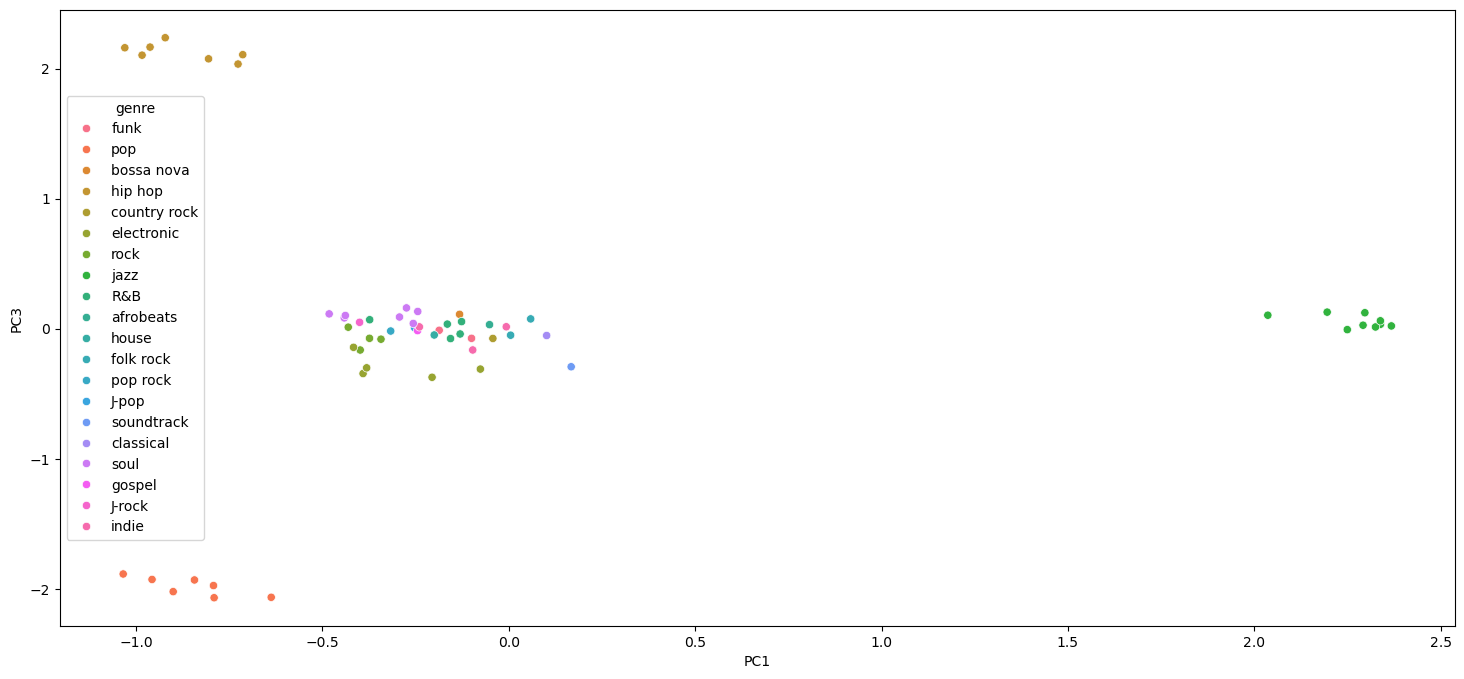

In [15]:
plt.figure(figsize=(18, 8))
sns.scatterplot(data=music, x="PC1", y="PC3", hue="genre")

<Axes: xlabel='PC1', ylabel='PC4'>

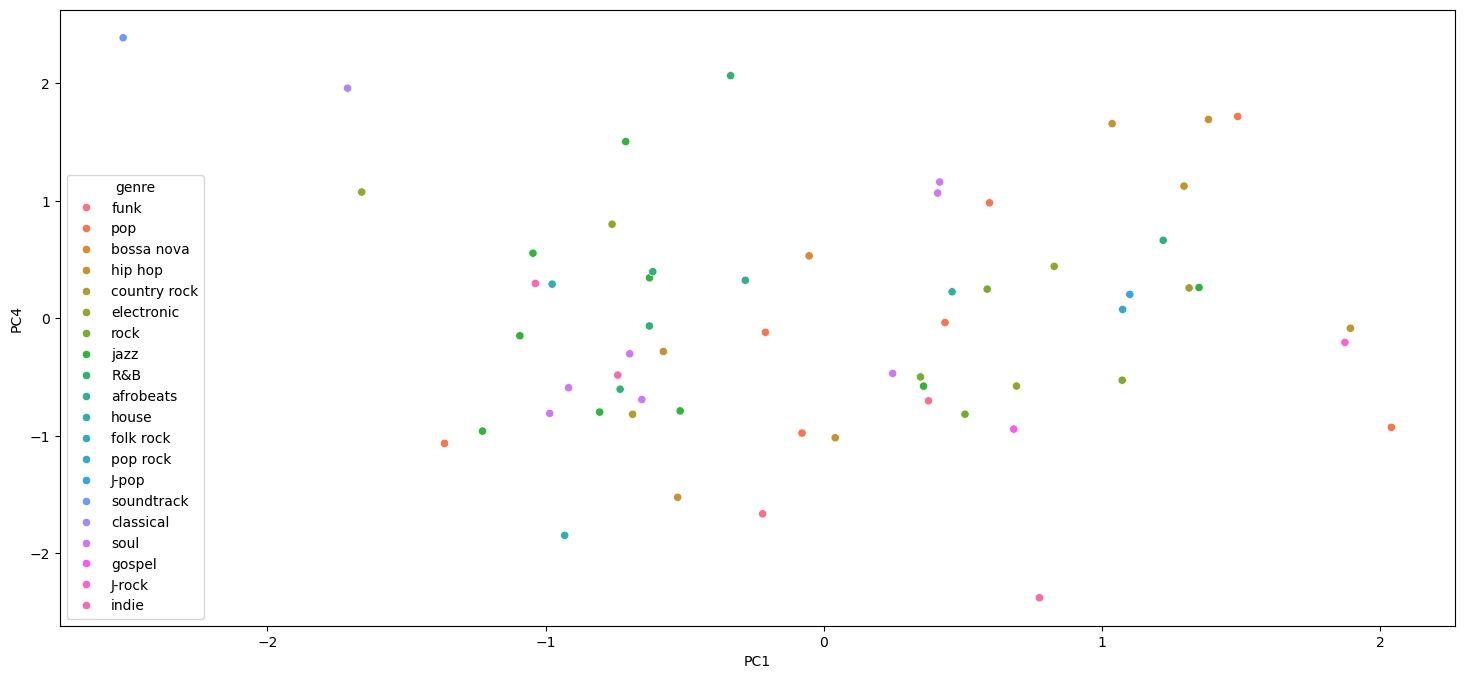

In [16]:
# music_2 (without OHE) analysis

plt.figure(figsize=(18, 8))
sns.scatterplot(data=music_2, x="PC1", y="PC4", hue="genre")

<Axes: xlabel='PC1', ylabel='PC2'>

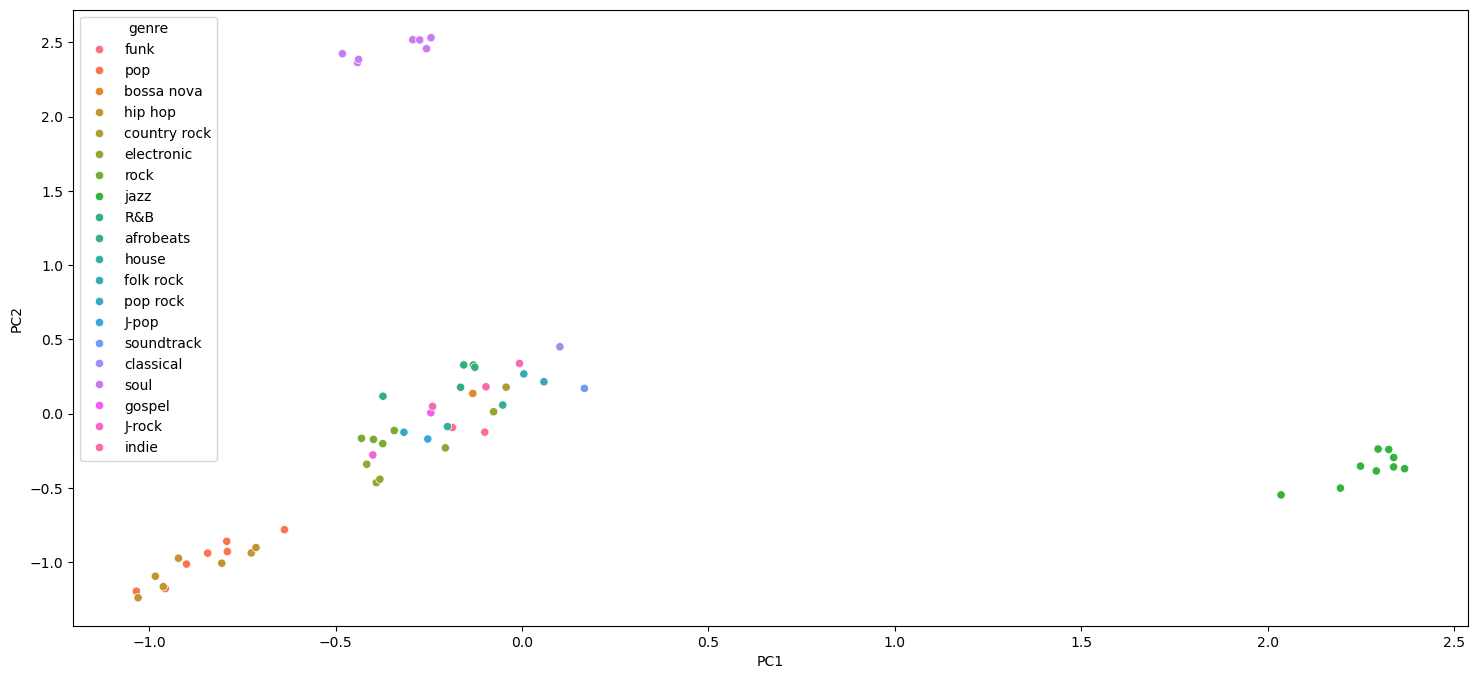

In [17]:
plt.figure(figsize=(18, 8))
sns.scatterplot(data=music, x="PC1", y="PC2", hue="genre")

<Axes: xlabel='PC1', ylabel='Count'>

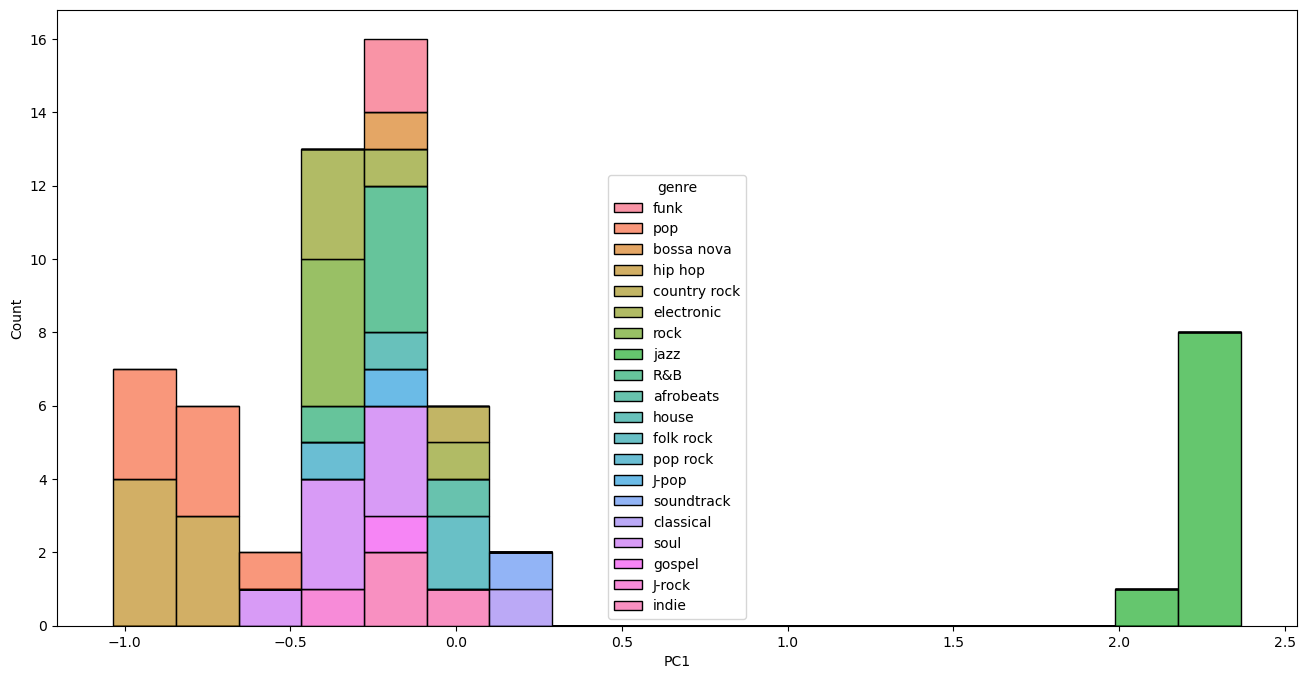

In [18]:
plt.figure(figsize=(16, 8))
sns.histplot(data=music, x="PC1", hue="genre", multiple="stack")

In [19]:
avg_value_genres_pc1 = music.groupby("genre")["PC1"].mean()

avg_value_genres_pc1.idxmax()

'jazz'

In [20]:
avg_value_genres_pc1.idxmin()

'hip hop'

<Axes: xlabel='PC2', ylabel='Count'>

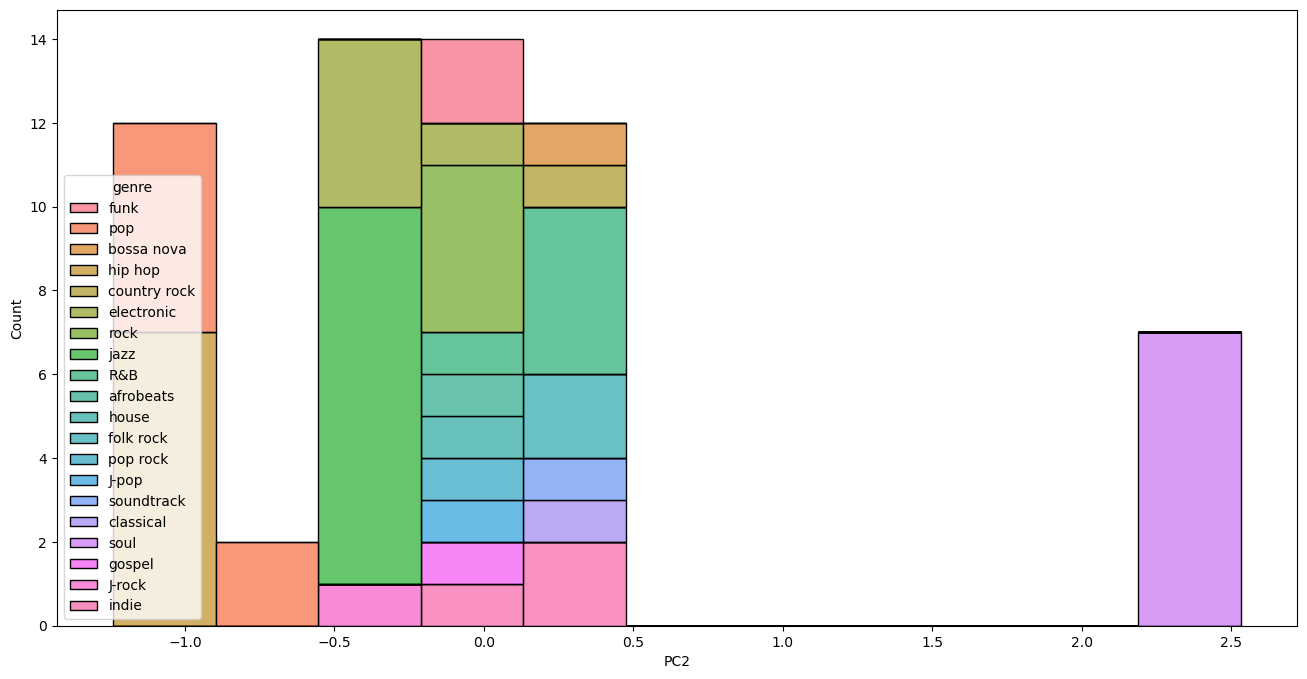

In [21]:
plt.figure(figsize=(16, 8))
sns.histplot(data=music, x="PC2", hue="genre", multiple="stack")

<Axes: xlabel='PC3', ylabel='Count'>

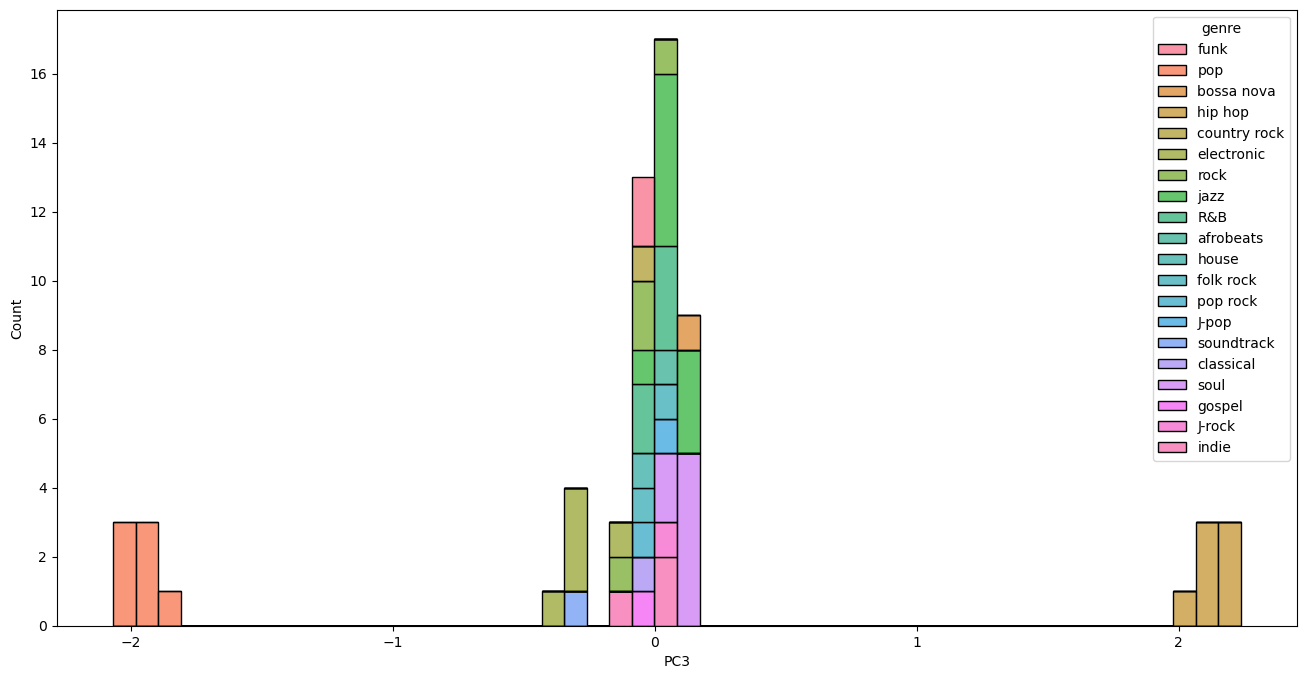

In [22]:
plt.figure(figsize=(16, 8))
sns.histplot(data=music, x="PC3", hue="genre", multiple="stack")

In [23]:
std_by_genre = music.groupby('genre')['PC1'].std()

std_by_genre.idxmax()

'electronic'

In [24]:
std_by_genre

genre
J-pop                NaN
J-rock               NaN
R&B             0.103520
afrobeats            NaN
bossa nova           NaN
classical            NaN
country rock         NaN
electronic      0.147659
folk rock       0.038068
funk            0.061332
gospel               NaN
hip hop         0.128194
house                NaN
indie           0.117553
jazz            0.102281
pop             0.129192
pop rock             NaN
rock            0.037268
soul            0.101972
soundtrack           NaN
Name: PC1, dtype: float64

<Axes: xlabel='PC4', ylabel='Count'>

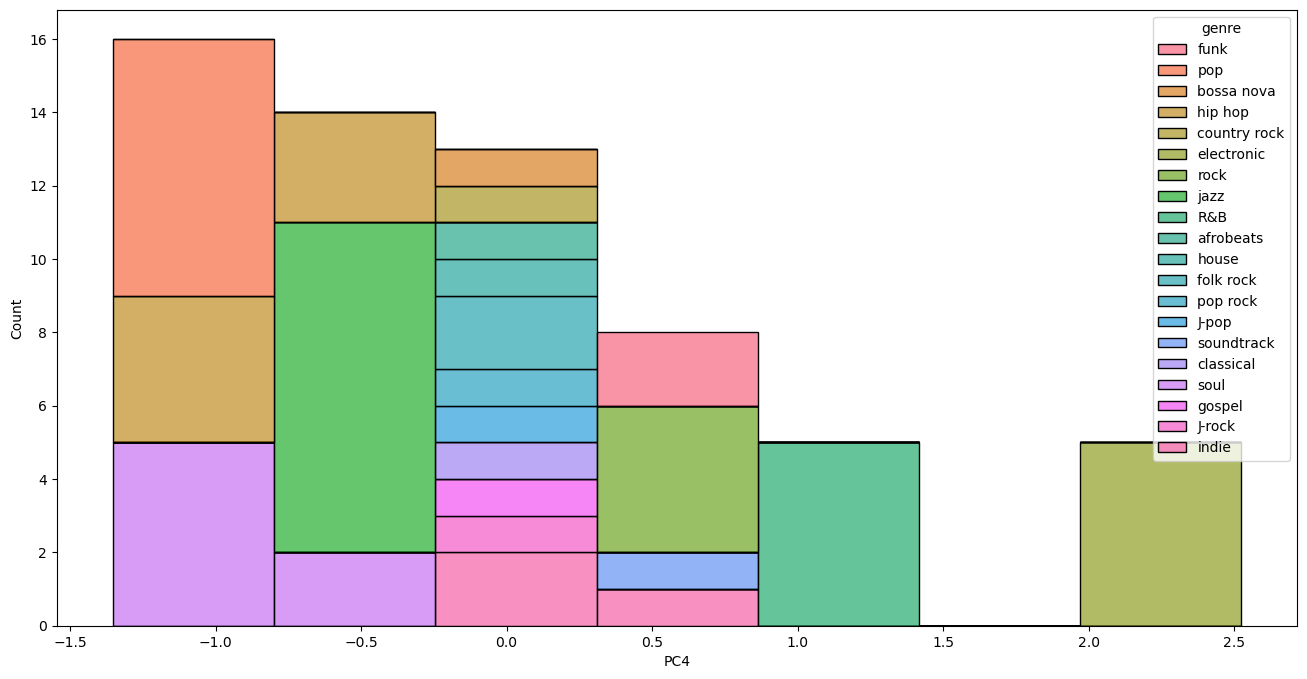

In [25]:
plt.figure(figsize=(16, 8))
sns.histplot(data=music, x="PC4", hue="genre", multiple="stack")

In [26]:
# Excluding all genres with at least 7 songs, for PC distribution analysis:

valid_genres_list = music["genre"].value_counts()
valid_genres_list = valid_genres_list[valid_genres_list >= 7].index.tolist()

valid_genres = music[music["genre"].isin(valid_genres_list)]

valid_genres.shape

(30, 6)

In [27]:
valid_genres["genre"].unique()

array(['pop', 'hip hop', 'jazz', 'soul'], dtype=object)

In [28]:
pop = valid_genres[valid_genres["genre"]=="pop"]
hiphop = valid_genres[valid_genres["genre"]=="hip hop"]
jazz = valid_genres[valid_genres["genre"]=="jazz"]
soul = valid_genres[valid_genres["genre"]=="soul"]

<Axes: xlabel='PC1', ylabel='Count'>

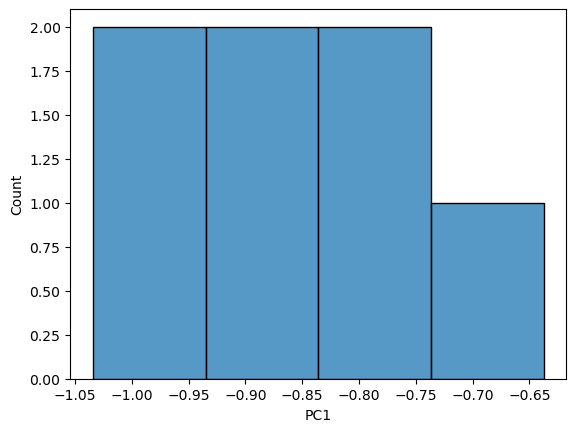

In [29]:
sns.histplot(data=pop, x="PC1")

<Axes: xlabel='PC2', ylabel='Count'>

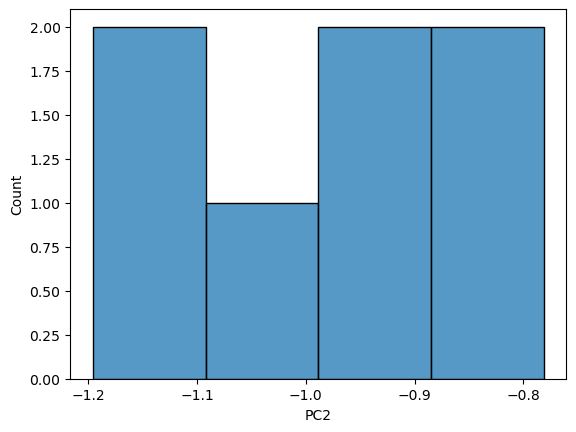

In [30]:
sns.histplot(data=pop, x="PC2")

<Axes: xlabel='PC3', ylabel='Count'>

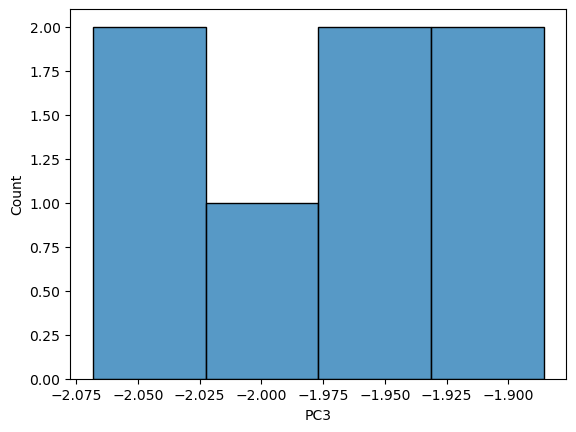

In [31]:
sns.histplot(data=pop, x="PC3")

<Axes: xlabel='PC4', ylabel='Count'>

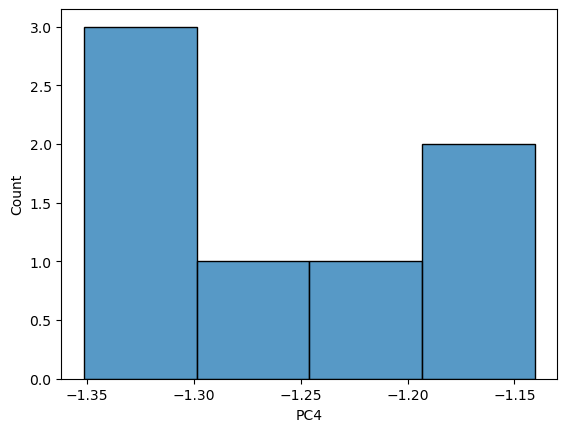

In [32]:
sns.histplot(data=pop, x="PC4")

<Axes: xlabel='PC1', ylabel='Count'>

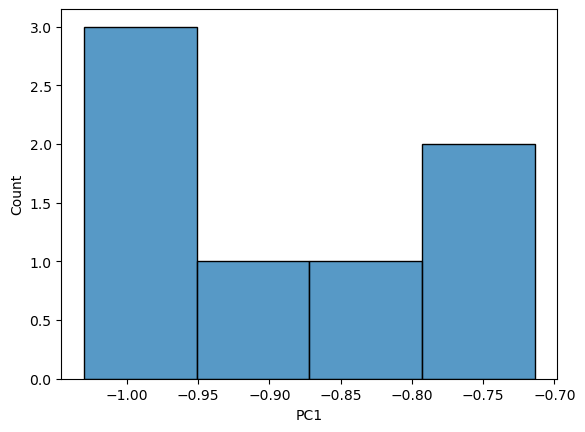

In [33]:
sns.histplot(data=hiphop, x="PC1")

<Axes: xlabel='PC2', ylabel='Count'>

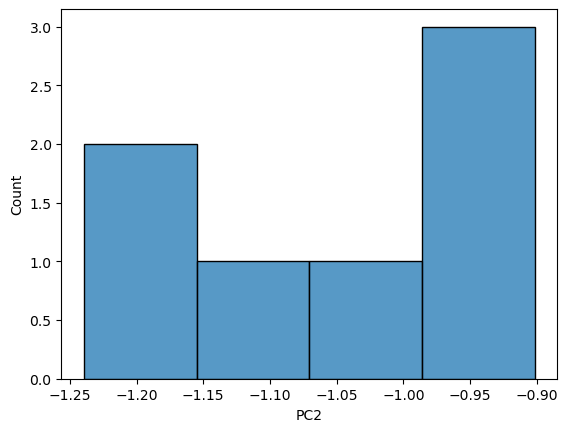

In [34]:
sns.histplot(data=hiphop, x="PC2")

<Axes: xlabel='PC3', ylabel='Count'>

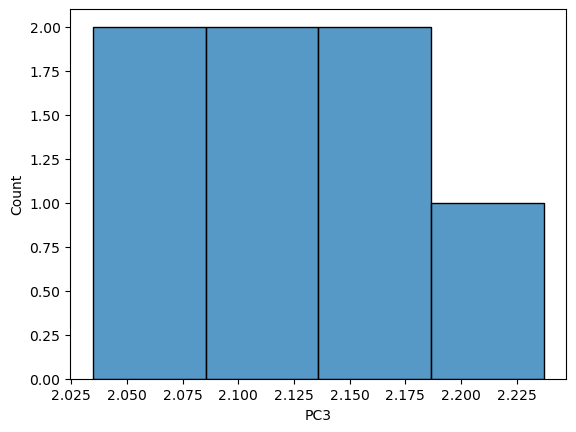

In [35]:
sns.histplot(data=hiphop, x="PC3")

<Axes: xlabel='PC4', ylabel='Count'>

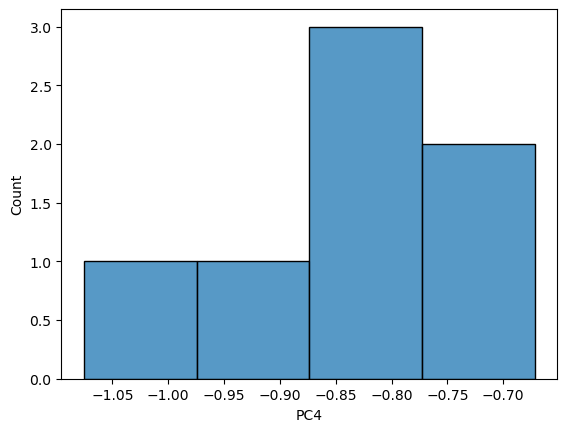

In [36]:
sns.histplot(data=hiphop, x="PC4")

In [37]:
data = music.iloc[:, 2:6]
data.head()

,PC1,PC2,PC3,PC4
0,-0.186758,-0.093329,-0.012221,0.397065
1,-0.957037,-1.178367,-1.927800,-1.233756
2,-0.132079,0.136183,0.110482,0.085188
3,-0.805447,-1.007022,2.074978,-0.706698
4,-0.962371,-1.164804,2.165031,-0.836024


In [38]:
corr_matrix = data.corr()
print(corr_matrix)

              PC1           PC2           PC3           PC4
PC1  1.000000e+00 -2.656395e-16 -3.196308e-16 -3.605379e-17
PC2 -2.656395e-16  1.000000e+00  3.593182e-16  1.885504e-16
PC3 -3.196308e-16  3.593182e-16  1.000000e+00 -9.031678e-17
PC4 -3.605379e-17  1.885504e-16 -9.031678e-17  1.000000e+00


In [39]:
music.to_csv("../data/music_pca_data.csv", index=False)
music_2.to_csv("../data/music_no_OHE.csv", index=False)

## Questions

Using the visualizations you've generated, answer the 4 exploratory questions below. If you are not able to answer this question, describe to the best of your ability, what sorts of roadblocks, errors, or questions  you encountered when attempting to answer the question. This will be sufficient for a full grade.

An example of what this looks like is included below.

### Example Question

Which individual tracks are outliers in PC space?

I’m not entirely sure of the exact formula or functions to use here
* Whats the right threshold for calling something an "outlier"?
* How do I handle missing or extreme PCA values before finding outliers?

### Q1 

How are songs distributed (if a distributione exists) in the principal‐component dimensions by genre?

ANS: After going through the genres and only selecting the groups that contain at least 7 songs per genre (in order to observe a distribution), there does not appear to be any identifiable skew or bell-curve: the histograms are mostly uniform. When observed together, however, PC1 seems to have a tri-modal distribution; PC2 has a somewhat right-skewed distribution; PC3 shows another tri-modal distribution; PC4 is very right-skewed.

### Q2 

Which genre shows the highest (and lowest) average value on PC1?

ANS: Highest average value on PC1: "jazz"
Lowest average value on PC1: "hip-hop"

### Q3 

Do any genres exhibit particularly wide dispersion along PC3?

ANS: "Electronic" music has the greatest PC3 dispersion amongst all genres, with a standard deviation of 0.056865. However, compared with the genre with the lest dispersion ("rock": 0.014352) it is not incredibly signifigant (at least I don't think...).

### Q4

Are any pairs of PCA components strongly correlated?

ANS: According to the resulting correlation matrix, none of the PCA components are strongly correlated as they are all very close to 0.